<a href="https://colab.research.google.com/github/matgyver/aere361class/blob/master/module9/AerE_361_Floating_Point_Numbers_and_IEEE_754.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Numerical Representation in Computers and IEEE 754

<img src="https://i.imgflip.com/130b6k.jpg" alt="Drawing" style="width: 100px;">

Today we are going to talk about the elements of understanding of how numbers are represented in today's computers and why that is importnat. We won't go too much into the details (which are perhaps not so relevant here), however it is extremely important for engineers to understand the pitfalls of the so-called "floating-point arithmetics". We are also going to talk about the IEEE 754 standard that is used in virtually all numerical calculations today which attempts to work with the issues of floating point math.  At the end of this lecture, you should understand:


*   How Floating Point numbers work on a computer
*   What the limitations are with Floating Point calculations
*   What errors can happen with Floating POint calculations
*   What the IEEE 754 standard is





##Binary representation of integers

Traditional arithmetics and mathematics rely on the decimal system. This works well for humans, but computers operate as binary devices.  On/Off, one or zero.

Nearly all modern processors however represent numbers in binary form, with each digit being represented by a two-valued physical quantity such as a "low" or "high" voltage: 0s and 1s. These binary digits are called bits, and are the basis of the binary representation of numbers.

![alt text](https://www.allaboutcircuits.com/uploads/articles/4_Bit_Adder.jpg)

With only 0s and 1s available the most efficient way to represent numbers is as a sum of 2s to the power of i, with i going from 0 to N-1. It is best shown with an example, here with N=4 digits:

0101

To convert our number to a decimal representation we compute

\begin{equation}
0*2^3+1*2^2+0*2^1+1*2^0 = 5
\end{equation}

In this convention, the leftmost digit is called the most significant bit and the rightmost the least significant bit. If all the elements from the left are zeros, the convention is to omit them when writing. This is for example what the built-in bin function chooses to do:

In [ ]:
bin(5)

'0b101'

which converts an integer number to a binary string prefixed with 0b. Now it appears quite clear that the number of different integers that a computer can represent with this system depends on the size N of the binary sequence. A positive integer represented with a byte (8 bits are called a byte) can thus be as large as:

In [ ]:
sum([2**i for i in range(8)])  # do you understand what this line does?

255

We have talked about in C how we can have signed and unsigned numbers.  If we are **signed**, the first bit is used to give the *sign* of the integer it represents. Therefore, the actual range of numbers that a byte can represent is $[-2^7; 2^7-1]= [-128; 127]$ (the reason for this asymmetry is a matter of definition, as we will see later). If you are sure that you only want to do arithmetics with positive number you can spare this one bit and specify your binary number as being of **unsigned integer type**.

So how many bits does our computer use to represent integers? Well, it depends on the platform and programming language you are using. Many older languages (including old python versions) made the distinction between short (32 bits) and long (64 bits) integers.  Most modern systems now use 64-bits.  However, for storage reasons, 32-bits or smaller is still often used.



Let's take a look at typical C program and what happens when you exceed the size of the variable you are storing it in.

##Overflow
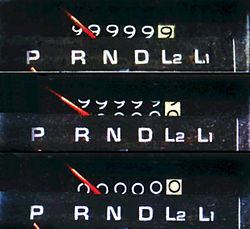

Ok, let's look at some C code and try to overflow a variable.  For this example we will use some small numbers so it is easier to see this in binary notation.  Therefore, we are going to force C to use 8-bit integers, both signed and unsigned.  Let's get started.


Below is our C program we will examine:

```c
/* AerE 361
IEEE 754 Demo
Matthew E. Nelson
*/

#include <stdio.h> 

void printBinary(int n, int i) 
{ 

    // Prints the binary representation 
    // of a number n up to i-bits. 
    int k; 
    for (k = i - 1; k >= 0; k--) { 

        if ((n >> k) & 1) 
            printf("1"); 
        else
            printf("0"); 
    } 
} 

int main() 
{ 
    __uint8_t test_integer = 255;
    
    printf("\n\n=========Overflow============\n");
    __uint8_t int_A = 0b11111111;
    __uint8_t int_B = 0x00000001;
    __uint8_t int_C = int_A + int_B;
    printf("%d + %d = %d \n\n",int_A, int_B, int_C);
    printf("In binary this is...\n");
    printf(" ");
    printBinary(int_A,sizeof(int_A)*8);
    printf("\n+");
    
    printBinary(int_B,sizeof(int_B)*8);
    printf("\n---------------\n");
    printf(" ");
    printBinary(int_C,sizeof(int_C)*8);
    printf("\n \nNow, try this with signed integers.\n");
    __int8_t int_D = 0b01111111;
    __int8_t int_E = 0x00000001;
    __int8_t int_F = int_D + int_E;
    printf("%d + %d = %d \n\n",int_D, int_E, int_F);
    printf("Again in binary this is...\n");
    printf(" ");
    printBinary(int_D,sizeof(int_D)*8);
    printf("\n+");
    
    printBinary(int_E,sizeof(int_E)*8);
    printf("\n---------------\n");
    printf(" ");
    printBinary(int_F,sizeof(int_F)*8);

    return 0; 
} 

```



Ok, this looks kind of long but we can divide this into a few things.  First, we have a function that is helping us to print the values in binary format.  C doesn't do this natively, so we have created a function to do this for us.

```c
void printBinary(int n, int i) 
{ 

    // Prints the binary representation 
    // of a number n up to i-bits. 
    int k; 
    for (k = i - 1; k >= 0; k--) { 

        if ((n >> k) & 1) 
            printf("1"); 
        else
            printf("0"); 
    } 
} 

```

Next, we want to use 8-bit integers, so we tell it we want unsigned 8-bit integers.  You will also note that I used binary notation to store the values (which C will happily take!).  Again, this is to help visualize what is happening here.

```c


    __uint8_t test_integer = 255;
    
    printf("\n\n=========Overflow============\n");
    __uint8_t int_A = 0b11111111;
    __uint8_t int_B = 0x00000001;
    __uint8_t int_C = int_A + int_B;
    

```

Finally, all we are doing is some basic ``printf`` statements and basic addition.  And, we get the following output:

```c
    printf("%d + %d = %d \n\n",int_A, int_B, int_C);
    printf("In binary this is...\n");
    printf(" ");
    printBinary(int_A,sizeof(int_A)*8);
    printf("\n+");
    
    printBinary(int_B,sizeof(int_B)*8);
    printf("\n---------------\n");
    printf(" ");
    printBinary(int_C,sizeof(int_C)*8);
    printf("\n \nNow, try this with signed integers.\n");
    __int8_t int_D = 0b01111111;
    __int8_t int_E = 0x00000001;
    __int8_t int_F = int_D + int_E;
    printf("%d + %d = %d \n\n",int_D, int_E, int_F);
    printf("Again in binary this is...\n");
    printf(" ");
    printBinary(int_D,sizeof(int_D)*8);
    printf("\n+");
    
    printBinary(int_E,sizeof(int_E)*8);
    printf("\n---------------\n");
    printf(" ");
    printBinary(int_F,sizeof(int_F)*8);

    return 0; 
```
##OUTPUT
```
=========Overflow============
255 + 1 = 0 

In binary this is...
 11111111
+00000001
---------------
 00000000
 
Now, try this with signed integers.
127 + 1 = -128 

Again in binary this is...
 01111111
+00000001
---------------
 10000000

```

##Sidenote on Python
In Python, we can't really **overflow** our variables like we can in C and some other languages.  Well, we can, but Python will often self-regulate what type of variable is needed unless of course we force Python to use a certain type or some libraries like NumPy are used again, the type is forced. Overflow is a common pitfall of many numerical operations, and to illustrate what it is we can either use floats (unlike python integers, python floats can overflow), or numpy, which uses integer types of fixed length.  Of course we still have some limitations, even with 64-bit intergers, we are limited to 18,446,744,073,709,551,615 for a unsigned and between -9,223,372,036,854,775,808 and 9,223,372,036,854,775,807 for a signed integer.

In [ ]:
import numpy as np
a = np.int8(127)
a.dtype

dtype('int8')

In [ ]:
a

127

In [ ]:
a + np.int8(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in byte_scalars
  """Entry point for launching an IPython kernel.


-128

So, like C programming, we can overflow, but in this case, Python told us this.  When you run the above C code, it will not give you an error.  However, Python is not immune to the silent (but deadly) overflow.


In [ ]:
np.int32(2147483648)

-2147483648

In [ ]:
a = np.array([18])
a**a

array([-497033925936021504])

These are examples of silent overflows. Silent means that they do not warn you about the probable mistake and could happen in your code without you noticing that this happens.

## Floating point numbers 

![alt text](https://www.smbc-comics.com/comics/20130605.png)

Because computers have a *finite* number of storage units available, they can only represent a *finite* number of distinguishable values. In fact, a memory slot with $N$ available bits cannot represent more than $2^N$ distinguishable values. The range of real (or complex) numbers is of course infinite, and therefore it becomes clear that in the computer representation of numbers **there will always be a trade-off between the range of numbers one would like to represent and their relative accuracy** (i.e. the absolute difference between two consecutive representable numbers). 

Taking the **decimal representation** of the number 1/3 as an example: it can be written as ``0.33``, ``0.333``, ``0.3333``, etc. Depending on the numbers of digits available, the precision of the number will increase but never reach the exact value, at least in the decimal representation.

This fundamental limitation is the explanation for unexpected results of certain arithmetic operations. For example:

In [ ]:
0.1 + 0.1  # so far so good

0.2

In [ ]:
0.1 + 0.2  # wtf?

0.30000000000000004

This is a typical **rounding error**, happening because most computers do not represent numbers as decimal fractions, but as binary. Without going too much into details (which can be tricky), this chapter will give you some elements of understanding in order to prepare you for the most common pitfalls of floating point arithmetics.

Let's take a look at this in C.  We have the following code we can look at.

```c
/* AerE 361
IEEE 754 Demo
Matthew E. Nelson
*/

#include <stdio.h> 

int main() 
{ 
    
    printf("\n\n=========Floating Point Math=========\n");
    float f_A = 0.1;
    float f_B = 0.2;
    
    printf("%0.8f + %0.8f = %0.8f\n",f_A,f_A,f_A + f_A);
    printf("So far so good, but...\n");
    
    printf("%0.8f + %0.8f = %0.8f\n",f_A,f_B,f_A + f_B);
    printf("Let's expand the number of digits...\n");
    printf("%0.10f + %0.10f = %0.10f\n",f_A,f_B,f_A + f_B);
    printf("In fact, looking at the first problem...\n");
    printf("%0.10f + %0.10f = %0.10f\n",f_A,f_A,f_A + f_A);

    return 0; 
} 
```

And if we run this, we get the following output:

##OUTPUT
```
=========Floating Point Math=========
0.10000000 + 0.10000000 = 0.20000000
So far so good, but...
0.10000000 + 0.20000000 = 0.30000001
Let's expand the number of digits...
0.1000000015 + 0.2000000030 = 0.3000000119
In fact, looking at the first problem...
0.1000000015 + 0.1000000015 = 0.2000000030
```

Like in the Python example, what we sometimes see and what is actually there is two different things.  We could print out all of those digits, but that can create for some really messy printing and today, with small screen devices like cell phones is not practical.  Instead, we need to be aware of what is going on here, otherwise rounding errors like what we just saw will happen.

### Scientific (exponential) notation in base b

In the exponential notation (used by [floating point](https://en.wikipedia.org/wiki/Floating-point_arithmetic) numbers), a number is approximated with a fixed number of significant digits (the significand) and scaled using an exponent in some fixed base; the base for the scaling is normally two, ten, or sixteen. A number that can be represented exactly is of the following form:

$\mathrm{number} = \mathrm{significand} \times \mathrm{base} ^{\mathrm{exponent}}$

For example, in base 10:

$$1.234 = 1234 \times 10^{-3}$$

The number ``1.234`` can easily be represented exactly in base 10, but the number 1/3 cannot. However, in base 3 (which is just used here as an example) 1/3 can be represented exactly by $1 \times 3^{-1}$.

To approximate a number in base 10, the rule of "the more bits you have, the more precise you are" continues to hold true: $33 \times 10^{-2}$ and $33333333333333 \times 10^{-14}$ are two ways to approximate the number, the later being more expensive in terms of storage requirements but more accurate. 

The exponential notation is the most common way to represent real numbers in computers and is the basis of the floating-point number representation.

### Floating point representation (simplified)

A floating point number in any base will store three numbers:
- the sign (one bit) 
- the significand ($N_s$ bits)
- the exponent ($N_e$ bits)

The numbers $N_s$ and $N_e$ are usually fixed beforehand, in the format specification. The base also needs to be specified of course: computers usually work in base 2, but other bases have been experimented with as well )e.g. 16, or hexadecimal). Now remember:
- **the significand determines the precision of the representation** (significant digits)
- **the exponent determines the magnitude of the represented number**

Let's make an example to illustrate this concept. We will work in base 10 for simplicity, and assume that we have 8 "memory slots" (the equivalent of bits) available, each memory slot capable of storing a number from 0 to 9 or the sign (+ or -). We attribute $N_s=6$ slots to the significand (including its sign) and $N_e=2$ slots to the exponent (including its sign). 

Now, what is the smallest positive number we can represent? And the biggest? Let's try it:

- smallest: $+00001 \times 10^{-9}$
- second smallest: $+00002 \times 10^{-9}$
- biggest: $+99999 \times 10^{+9}$
- second biggest: $+99998 \times 10^{+9}$

From these examples it becomes apparent that the precision (the distance between two consecutive numbers) is better for small numbers than for large numbers. Although our example is simplified, the principle is exactly the same for "real" floating point numbers in most computers, which follow the IEEE754 convention.

### IEEE 754 

From the example above, we can see that with a fixed number of memory slots, we have a trade-off between the maximum precision of a number and its size.



This precision/size trade-off raises many challenges: memory and electronics must be optimized so that computations are fast while still allowing programs to realize computations on a *wide* range of numbers in the same program. For example, atmospheric models realize computations on specific humidity values ($\mathrm{kg}\,\mathrm{kg}^{-1}$) with typical values of 10$^{-5}$ and on the geopotential with values up to several order of magnitude larger. Using different standards for each variable would be impracticable. This lead to the development of the [IEEE Standard for Floating-Point Arithmetic (IEEE 754)](https://en.wikipedia.org/wiki/IEEE_754).

The standard defines five basic formats that are named for their numeric base and the number of bits used in their encoding, as listed in [this table](https://en.wikipedia.org/wiki/IEEE_754#Basic_and_interchange_formats). For example, ``binary64`` is the famous "double precision" format, called ``float64`` in numpy ``double`` in C, and simply ``float`` in the python standard library. In this format, $N_s=53$ bits are used for the significand, and the remaining $N_e=11$ for the exponent.

IEEE 754 can be broken down to 3 basic components:
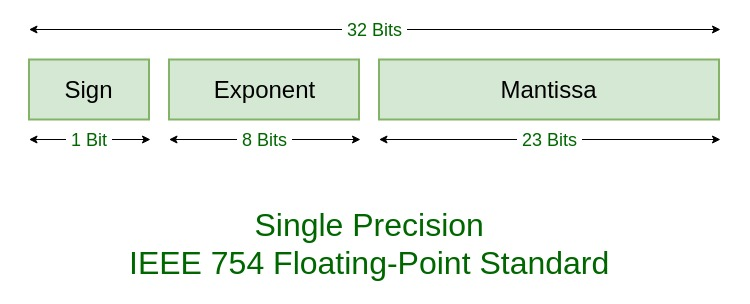

We can see here that we have a sign bit (like any signed number), the biased exponent, and the normalized mantissa.  The biased exponent represents both the positive and negative exponents.  The mantissa is part of a number in scientific notation or a floating point number consisting of its significant digits.  Let's break this down.

Let's look at the number 85.125

Let's look at the number 85.125.  Our first step is to break this at the decimal point.  So we will do a representation of 85 and .125 in binary.

In [ ]:
a = bin(85)
print(a)

0b1010101


So that part is the easy part.  We can just take 85 and easily convert that to binary, but what about the .125?  Well, we just can't take the decimal of 125, it is a fraction, so we need to do this step by step.  To convert to binary, we take .125 and times 2.  Now, take the .25 and take it times 2 and we get 0.5 and finally take 0.5 times two and we get 1.0.  We know when we are done we get a 1 or 0 (with no decimals left).  No look at the column to the left of the results and read down.  We get 001.  To make this easier, I have made the columns line up in the example below.

```
0.125 * 2 = 0.25
0.25 * 2  = 0.5
0.5 * 2   = 1.0
```


In [ ]:
print(.125*2)
print(.25*2)
print(0.5*2)
b = bin(1)

0.25
0.5
1.0


So, 85.125, in binary is represented as
```
1010101.001
```

Now we can look at what this would be represented by if we converted this to an exponent.  To do that, we shift the decimal point so that the new repsentation is:
$1.010101001 x 2^6$

Since we shifted the decimal point 6 places, our exponent is 6.  But remember what I said earlier, we have a biased exponent.  Our bias for a 32-bit single precision floating point is 127.  So our biased exponent is 127+6.  This gives us 133 which we can easily convert to binary.

```
10000101
```



In [ ]:
bin(127+6)

'0b10000101'

This is our exponent.  We have 8-bits for our exponent and we have 8-bits here so we are good to go.  Our Mantissa is the binary representation to the right of the decimal place.  Now, we have 23-bits for our mantissa and ours is smaller than that, but we can simply pad the extra zeros at the end, so we get the following.
```
01010100100000000000000
```

Remember, we are a positive number so our signed bit is zero.  Our final result is:

| Sign           |Biased Exponent|Normalized Mantissa|
| :-------------: | :----------: | :-----------: |
|  0 | 10000101   | 01010100100000000000000    |

We can also write a program that allows us to show this repsentation.  That code is below.
```c
/* AerE 361
IEEE 754 Demo
Matthew E. Nelson
*/

#include <stdio.h> 

void printBinary(int n, int i) 
{ 

    // Prints the binary representation 
    // of a number n up to i-bits. 
    int k; 
    for (k = i - 1; k >= 0; k--) { 

        if ((n >> k) & 1) 
            printf("1"); 
        else
            printf("0"); 
    } 
} 

typedef union { 

    float f; 
    struct
    { 

        // Order is important. 
        // Here the members of the union data structure 
        // use the same memory (32 bits). 
        // The ordering is taken 
        // from the LSB to the MSB. 
        unsigned int mantissa : 23; 
        unsigned int exponent : 8; 
        unsigned int sign : 1; 

    } raw; 
} myfloat; 

// Function to convert real value 
// to IEEE foating point representation 
void printIEEE(myfloat var) 
{ 

    // Prints the IEEE 754 representation 
    // of a float value (32 bits) 

    printf("%d | ", var.raw.sign); 
    printBinary(var.raw.exponent, 8); 
    printf(" | "); 
    printBinary(var.raw.mantissa, 23); 
    printf("\n"); 
} 

// Main Function
int main() 
{ 
    // Instantiate the union 
    myfloat var; 

    // Get the real value 
    var.f = 85.125; 
    
    printf("\n\n=========IEEE 754 Representation=========\n");
    // Get the IEEE floating point representation 
    printf("IEEE 754 representation of is : %f \n",
        var.f);
    printf("SB|Exponent  |Mantissa\n");
    printIEEE(var);

    return 0; 
} 
```
Again, we are using our print binary to help represent our values in binary notation.  We then have a function that splits the float into the integer value and the decimal value.  Then we apply our rules that we just discussed.  Using the value of 85.125, we get the following output.

##OUTPOUT
```
=========IEEE 754 Representation=========
IEEE 754 representation of is : 85.125000 
SB|Exponent  |Mantissa
0 | 10000101 | 01010100100000000000000
```


It is possible to compute the approximate precision of IEEE754 floating point numbers according to their value (see also the exercises):

![img](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/IEEE754.png/550px-IEEE754.png)
Source: [wikipedia](https://en.wikipedia.org/wiki/IEEE_754)

### Consequences 

With the floating point format, **small numbers have a larger absolute precision than large numbers**. See this example:

In [ ]:
.99 == .98  # so far so good

False

In [ ]:
999999999999999.99 == 999999999999999.98  # wtf?

True

In [ ]:
999999999999999.99  # wtf?

1000000000000000.0

A further direct consequence is that **when summing two numbers, precision is lost to match the size of the outcome**.

## What to do from here? 

As we've learned, errors in floating-point numbers are unavoidable. Even if these errors are very small, simple calculations on approximated numbers can contain pitfalls that increase the error in the result way beyond just having the individual errors "add up". Here we discuss some possible ways to deal with the pitfalls of floating point arithmetics.

### Alternative data types 

In certain cases where perfect decimal accuracy is needed (for example when dealing with currencies and money), it is possible to use a decimal floating point representation instead of the default binary one:

In [ ]:
1/10*3  # not precise

0.30000000000000004

In [ ]:
from decimal import Decimal
Decimal(1) / Decimal(10) * 3  # precise

Decimal('0.3')

With limited-precision decimals there are no unexpected rounding errors. In practice, however, such alternative datatypes are used rarely because the precision gain comes with a performance overhead: computers work best with 0s and 1s, not with numbers humans can read.  

### Symbolic computations 

Symbolic computations are realized *literally* (like in mathematics), not approximately. [SymPy](http://www.sympy.org) is a popular python library for symbolic mathematics.  MatLab is another program that we use that can perform operations symbolically as well.  In C, there is nothing that is built in, but like any programming language, there are libraries (GAP, Mathomatic).

In [ ]:
import sympy
a = sympy.sympify('1 / 3')
a + a

2/3

Seams like the perfect solution, right? It probably is if you are a mathematician, but for actual numerical computations SymPy will be way too slow to use. Symbolic mathematics can only be used for problems where analytical solutions are known. Unfortunately, this is not always the case (take numerical models of the atmosphere for example).

### Deal with it 

![alt text](https://i.imgflip.com/9g5rd.jpg)

There are no simple answers to numerical rounding errors. Therfore: **be aware that they occur and try to mitigate their effect**.

#### Awareness 

*Awareness* is mostly hindered by the string representation of floating point numbers. In practice:

In [ ]:
0.1

0.1

In [ ]:
format(0.1, '.16g')  # give 16 significant digits

'0.1'

In [ ]:
format(0.1, '.30g')  # give 30 significant digits

'0.100000000000000005551115123126'

The default `0.1` print is therefore a "lie", but it is a useful one: in most cases you don't want to know about these insignificant digits at the end. The [numpy.finfo](https://docs.scipy.org/doc/numpy/reference/generated/numpy.finfo.html) is a useful function informing you about the machine limits for floating point types:

In [ ]:
info = np.finfo(np.float)
info.bits, info.precision, info.max

(64, 15, 1.7976931348623157e+308)

#### Error propagation 

![alt text](https://i.redd.it/nls3ejh4f8111.png)

Preventing rounding errors to happen is not possible, but there are a few general rules:
- Multiplication and division are "safer" operations
- Addition and subtraction are dangerous, because when numbers of different magnitudes are involved, digits of the smaller-magnitude number are lost.
- This loss of digits can be inevitable and benign (when the lost digits are also insignificant for the final result) or catastrophic (when the loss is magnified and distorts the result strongly).
- The more calculations are done (especially when they form an iterative algorithm) the more important it is to consider this kind of problem.
- A method of calculation can be stable (meaning that it tends to reduce rounding errors) or unstable (meaning that rounding errors are magnified). Very often, there are both stable and unstable solutions for a problem.

(list taken from [the floating point guide](http://floating-point-gui.de/errors/propagation/))

As illustration for the difference between addition and multiplication, see the following example:

In [ ]:
a = 10 * 0.1
b = 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1 + 0.1
a == b

False

In [ ]:
a, b

(1.0, 0.9999999999999999)

Realize **safer computations** therefore involves asking yourself at which stage the most precision is going to be lost: this is most often the case when adding numbers of very different magnitudes. When building numerical models, this should always be something you consider: is a formula leading to dangerous additions, then reformulate it and/or use other units for your variables (e.g. $\mathrm{g}\,\mathrm{kg}^{-1}$ instead of $\mathrm{kg}\,\mathrm{kg}^{-1}$ for specific humidity). Consider the following example:

In [ ]:
a = 1
b = 1e-16
c = 10

In [ ]:
c1 = c * (a + b)
c2 = c * a + c * b

In [ ]:
c1 == c2

False

``c * (a + b)`` and ``c * a + c * b`` are mathematically equivalent, and the first is computationally less expensive (two operations instead of three). However, the second is less prone to rounding errors!

#### Safer tests 

Fortunately, rounding errors often remain unnoticed, meaning that your computations are probably OK! In engineering, we may have placed limits to how much precision we want or what we can even work with.  This may be due to manufacturing or measurement restrictions.  In these cases, prefer to use numpy's specialized functions:

In [ ]:
np.isclose(c1, c2)  # OK you don't care about small numerical errors

True

## Take home points

- computers can only represent a finite number of distinguishable values.
- the range of representable numbers depends on the size of memory allocated to store it. There is practically no limit to the size of integers in python, but there is a limit for floats. Numpy implements several types of variables named after their size in bits (e.g. ``np.float32``, ``np.float64``, ``np.float128``).
- there are many different ways to represent numbers on computers, all with different strengths and weaknesses. The vast majority of systems use the [IEEE 754](https://en.wikipedia.org/wiki/IEEE_754) standard for floating points, which is a good compromise between range and accuracy. Most systems are binary (base 2) per default, but there are other bases available: base 10 (decimal) and base 16 (hexadecimal) are frequent as well.
- rounding errors happen because of these limitations. They always happen, even for the simplest arithmetics, and you **shall not ignore them**.
- the fact that a number is printed "correctly" on screen does not mean that its internal binary representation is perfect. In fact, it is statistically much more probable (*inifinitely* more probable) that a number is not represented exactly by the floating-point format
- however, there are ways to mitigate the impact of these rounding errors. This includes the use of more precise datatypes (e.g. float64 instead of float32), alternative representations (decimal instead of binary), and the use of more conservative operations (e.g. multiplication before addition when dealing with numbers of different magnitude)
- floating point errors have dramatic consequences in chaotic systems. A scary example is given in [this paper](https://journals.ametsoc.org/doi/pdf/10.1175/MWR-D-12-00352.1) about the influence of floating point computations on numerical weather forecasts.

## Further reading 

Because of the importance of floating point computations you will find many resources online. I **highly recommend** to go through the short [floating point guide](http://floating-point-gui.de/) website, which explains the problem to non specialists. It will give you another point of view on the topic.

Other resources:
- [Python's documentation](https://docs.python.org/3/tutorial/floatingpoint.html) on floating point arithmetic
- [What Every Computer Scientist Should Know About Floating-Point Arithmetic](https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html): kind of heavy, but a reference text